# IMPLEMENTATION OF METHODS

In [75]:
# standard libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
%load_ext autoreload
%autoreload 2

# own functions
import proj1_helpers as P1H
import dataprocessing as DP
import methods as ME
import cross_validation as CV

from grad_loss import*

#constants
train_path = 'train.csv'
test_path = 'test.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
#Importing data: 
y, x, ids = load_csv_data(train_path, sub_sample=True)

ratio = 0.8

x_tr, x_te, y_tr, y_te = DP.split_data(x, y, ratio)

In [43]:
train_x = normalize(x_tr)
test_x = normalize(x_te)

### Least Squares GD

In [89]:
initial_w_GD = np.zeros((train_x.shape[1], 1))
gamma_GD = 0.00126896
max_iters_GD = 1000
k_folds = 5

#Cross validation
avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.least_squares_GD, y_tr, train_x, k_folds, initial_w_GD, max_iters_GD, gamma_GD)

print("Error in percentage in least squares GD with gamma", gamma_GD, "and", max_iters_GD, "iterations:", avg_acc)

Error in percentage in least squares GD with gamma 0.2 and 1000 iterations: 0.263


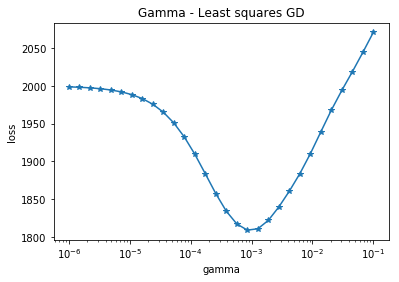

lowest value of lambda: 0.00126896100317


In [92]:
# Finding optimal Gamma 

gammas_LSGD=np.logspace(-6,-1,30)

loss_LSGD_all=[]

for gamma_LSGD in gammas_LSGD:
    
    loss_LSGD, w_LSDG = ME.least_squares_GD(y_tr, train_x, initial_w_GD,max_iters_GD, gamma_LSGD)
    
    loss_LSGD_all.append(loss_LSGD)
    
plt.semilogx(gammas_LSGD, loss_LSGD_all,'*-',)  
plt.title('Gamma - Least squares GD')
plt.ylabel('loss')
plt.xlabel('gamma')

plt.show()

print("lowest value of lambda:", gammas_LSGD[18])

### Least Squares SGD

In [78]:
initial_w_SGD = np.zeros((train_x.shape[1], 1))

gamma_SGD = 0.00032903
max_iters_SGD = 3000
k_folds = 5

#Cross validation
avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.least_squares_SGD, y_tr, train_x, k_folds, initial_w_SGD, max_iters_SGD, gamma_SGD)

print("Error in percentage in least squares GD with gamma", gamma_GD, "and", max_iters_GD, "iterations:", avg_acc)

Error in percentage in least squares GD with gamma 0.2 and 1500 iterations: 0.33209999999999995


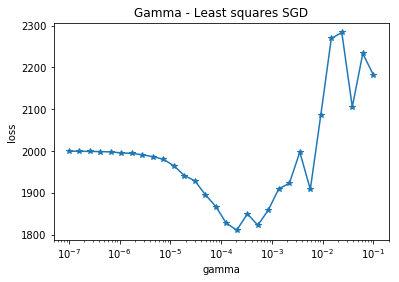

lowest value of lambda: 0.000329034456231


In [79]:
# Finding optimal Gamma 

gammas_LSSGD=np.logspace(-7,-1,30)

loss_LSSGD_all=[]

for gamma_LSSGD in gammas_LSSGD:
    
    loss_LSSGD, w_LSSDG = ME.least_squares_SGD(y_tr, train_x, initial_w_SGD,max_iters_SGD, gamma_LSSGD)
    
    loss_LSSGD_all.append(loss_LSSGD)
    
plt.semilogx(gammas_LSSGD, loss_LSSGD_all,'*-',)  
plt.title('Gamma - Least squares SGD')
plt.ylabel('loss')
plt.xlabel('gamma')

plt.show()

print("lowest value of lambda:", gammas_LSSGD[17])

### Least Squares

In [98]:
k_folds = 5

avg_loss, losses, avg_acc, pred_acc_percents = CV.cross_validation(ME.least_squares, y_tr, train_x, k_folds)

print("Average error in percentage in least squares:", avg_acc)


Average error in percentage in least squares: 0.2495


### Ridge Regression

In [7]:
lambda_RR= 2.33572146909e-05

loss_RR, w_RR = ME.ridge_regression(y_tr, train_x, lambda_RR)

y_pred_RR = P1H.predict_labels(w_RR, x_te) 
accuracy_RR = DP.pred_acc(y_te, y_pred_RR)

print("Error in percentage in ridge regression with lambda", lambda_RR, ":", accuracy_RR[0])

Error in percentage in ridge regression with lambda 2.33572146909e-05 : 0.253


In [22]:
lambdas_RR=np.logspace(-7,2,20)
accuracy_RR_all=[]
loss_RR_all=[]

for lambda_RR in lambdas_RR:
    
    loss_RR, w_RR = ME.ridge_regression(y_tr, train_x, lambda_RR)
    
    y_pred_RR = P1H.predict_labels(w_RR, x_te) 
    accuracy_RR = DP.pred_acc(y_te, y_pred_RR)
    
    accuracy_RR_all.append(accuracy_RR[0])
    loss_RR_all.append(loss_RR)

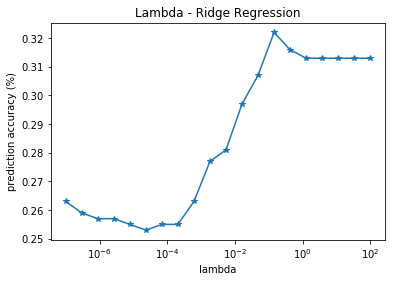

lowest value of lambda: 2.33572146909e-05


In [45]:
plt.semilogx(lambdas_RR, accuracy_RR_all,'*-',)  
plt.title('Lambda - Ridge Regression')
plt.ylabel('prediction accuracy (%)')
plt.xlabel('lambda')

plt.show()

print("lowest value of lambda:", lambdas_RR[5])

### Logistic regression

In [10]:
##Before we preform logistic regression we must add a constant (intercept) in the x, and set y to 1/0 (instead of 1/-1)
train_x_LR = np.c_[np.ones((train_x.shape[0], 1)), train_x]
test_x_LR = np.c_[np.ones((test_x.shape[0], 1)), test_x]

ty_LR = classify(y_tr)



In [106]:
max_iters_LR = 500
gamma_LR = 6.5e-05

initial_w_LR = np.zeros((train_x_LR.shape[1], 1))

loss_LR, w_LR = ME.logistic_regression(ty_LR, train_x_LR, initial_w_LR, max_iters_LR, gamma_LR) 

y_pred_LR = DP.log_pred(test_x_LR, w_LR)

accuracy_LR = DP.pred_acc(y_te, y_pred_LR)

print("Error in percentage using Logistic regression with gamma", gamma_LR, "and", max_iters_LR, "iterations:", accuracy_LR[0])

Error in percentage using Logistic regression with gamma 6.5e-05 and 500 iterations: 0.872


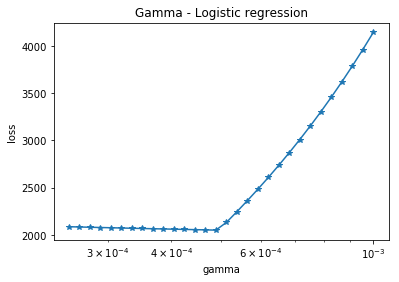

lowest value of gamma: 0.000513268754998


In [118]:
# Finding optimal Gamma 
gammas_LR = np.logspace(-3.6,-3,30)
k_folds = 5

loss_LR_all = []

for gamma_LR in gammas_LR:
    
    loss_LR, w_LR = ME.logistic_regression(ty_LR, train_x_LR, initial_w_LR,max_iters_LR, gamma_LR)
    
    loss_LR_all.append(loss_LR)
    
plt.semilogx(gammas_LR, loss_LR_all,'*-',)  
plt.title('Gamma - Logistic regression')
plt.ylabel('loss')
plt.xlabel('gamma')

plt.show()

print("lowest value of gamma:", gammas_LR[15])

### Regular Logistic regression

In [12]:
##Before we preform Regular logistic regression we must add a constant (intercept) in the x, and set y to 1/0 (instead of 1/-1)
train_x_RLR = np.c_[np.ones((train_x.shape[0], 1)), train_x]
test_x_RLR = np.c_[np.ones((test_x.shape[0], 1)), test_x]

ty_RLR = classify(y_tr)

max_iters_RLR = 1000
gamma_RLR = 6.5e-05
lambda_RLR = 1e-02

initial_w_RLR = np.zeros((train_x_RLR.shape[1], 1))

In [13]:
loss_RLR, w_RLR = ME.reg_logistic_regression(ty_RLR, train_x_RLR, lambda_RLR, initial_w_RLR, max_iters_RLR, gamma_RLR)

y_pred_RLR = DP.log_pred(test_x_RLR, w_RLR)

accuracy_RLR = DP.pred_acc(y_te, y_pred_RLR)

print("Error in percentage in regularized logistic regression with gamma", gamma_RLR, ", lambda", lambda_RLR,
      "and", max_iters_RLR, "iterations:", accuracy_RLR[0])


Error in percentage in regularized logistic regression with gamma 6.5e-05 , lambda 0.01 and 1000 iterations: 0.265


In [38]:
#To choose the best value of lambda, several different values are plotted
lambdas_RLR=np.logspace(-2,2,20)
accuracy_RLR_all=[]
loss_RLR_all=[]

for lambda_RLR in lambdas_RLR:
    
    loss_RLR, w_RLR = ME.reg_logistic_regression(ty_RLR, train_x_RLR, lambda_RLR, initial_w_RLR, max_iters_RLR, gamma_RLR)
    
    y_pred_RLR = DP.log_pred(test_x_RLR, w_RLR)
    accuracy_RLR = DP.pred_acc(y_te, y_pred_RLR)
    
    accuracy_RLR_all.append(accuracy_RLR[0])
    loss_RLR_all.append(loss_RLR)

best_lambda_value = lambdas_RLR[accuracy_RLR_all.index(min(accuracy_RLR_all))]


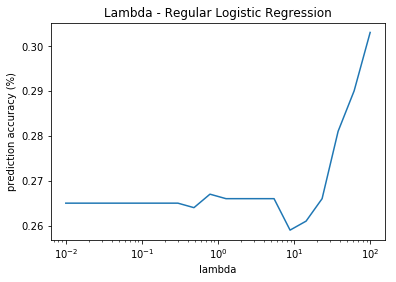

Best value of lambda: 8.8586679041


In [40]:
plt.semilogx(lambdas_RLR,accuracy_RLR_all)

plt.title('Lambda - Regular Logistic Regression')
plt.ylabel('prediction accuracy (%)')
plt.xlabel('lambda')
plt.show()

print("Best value of lambda:", best_lambda_value)